In [15]:
import rasterio 
import numpy as np
import matplotlib.pylab as plt

In [27]:
with rasterio.open('landsat2014_B4.TIF') as src:
    red2014= src.read()
    profile= src.profile
    transform=src.transform
    crs=src.crs
    
with rasterio.open('landsat2014_B5.TIF') as src:
    nir2014= src.read()

with rasterio.open('landsat2024_B4.TIF') as src:
    red2024= src.read()

with rasterio.open('landsat2024_B5.TIF') as src:
    nir2024= src.read()

    

In [4]:
def calc_ndvi(nir, red):
    ndvi=(nir-red)/(nir+red)
    return ndvi 

In [5]:
ndvi2014= calc_ndvi(nir2014,red2014)
ndvi2024= calc_ndvi(nir2024, red2024)


C:\Users\mahsa.derakhshan\AppData\Local\Temp\ipykernel_18712\462966061.py:2: RuntimeWarning: divide by zero encountered in divide
  ndvi=(nir-red)/(nir+red)
C:\Users\mahsa.derakhshan\AppData\Local\Temp\ipykernel_18712\462966061.py:2: RuntimeWarning: invalid value encountered in divide
  ndvi=(nir-red)/(nir+red)


In [6]:
ndvi_change= ndvi2024-ndvi2014


In [11]:
ndvi_change.shape

(1, 7781, 7651)

In [17]:
class_ndvi_change= np.where(ndvi_change>0.1, 1, np.where(ndvi_change<-0.1, -1, 0))
class_ndvi_change=class_ndvi_change.squeeze()

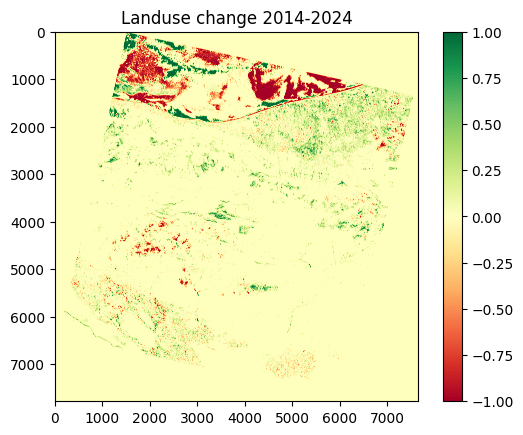

In [21]:
plt.imshow(class_ndvi_change,cmap='RdYlGn')
plt.colorbar()
plt.title('Landuse change 2014-2024')
plt.show()

In [23]:
with rasterio.open('nvdi_change.tif','w',**profile) as dst:
    dst.write(class_ndvi_change.astype(rasterio.int32),1)

In [25]:
def get_raster_value(xy, raster, transform):
    xy=list(xy)
    row, col= ~transform*(xy[1],xy[0])
    row, col=int(row), int(col)
    value=raster[row, col]
    return value 


In [26]:
cords=51.49584001691029, 7.362152906376442
get_raster_value(cords, class_ndvi_change, transform)

IndexError: index -16039 is out of bounds for axis 0 with size 7781

In [28]:
crs

CRS.from_epsg(32639)

In [1]:
import rsgislib 